In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [28]:
data_df = pd.read_csv("bank.csv")
data_df.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
data_df1 = data_df.replace({'yes': 1, 'no': 0})
data_df1.head()

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_52676/2318289825.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df1 = data_df.replace({'yes': 1, 'no': 0})


,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0


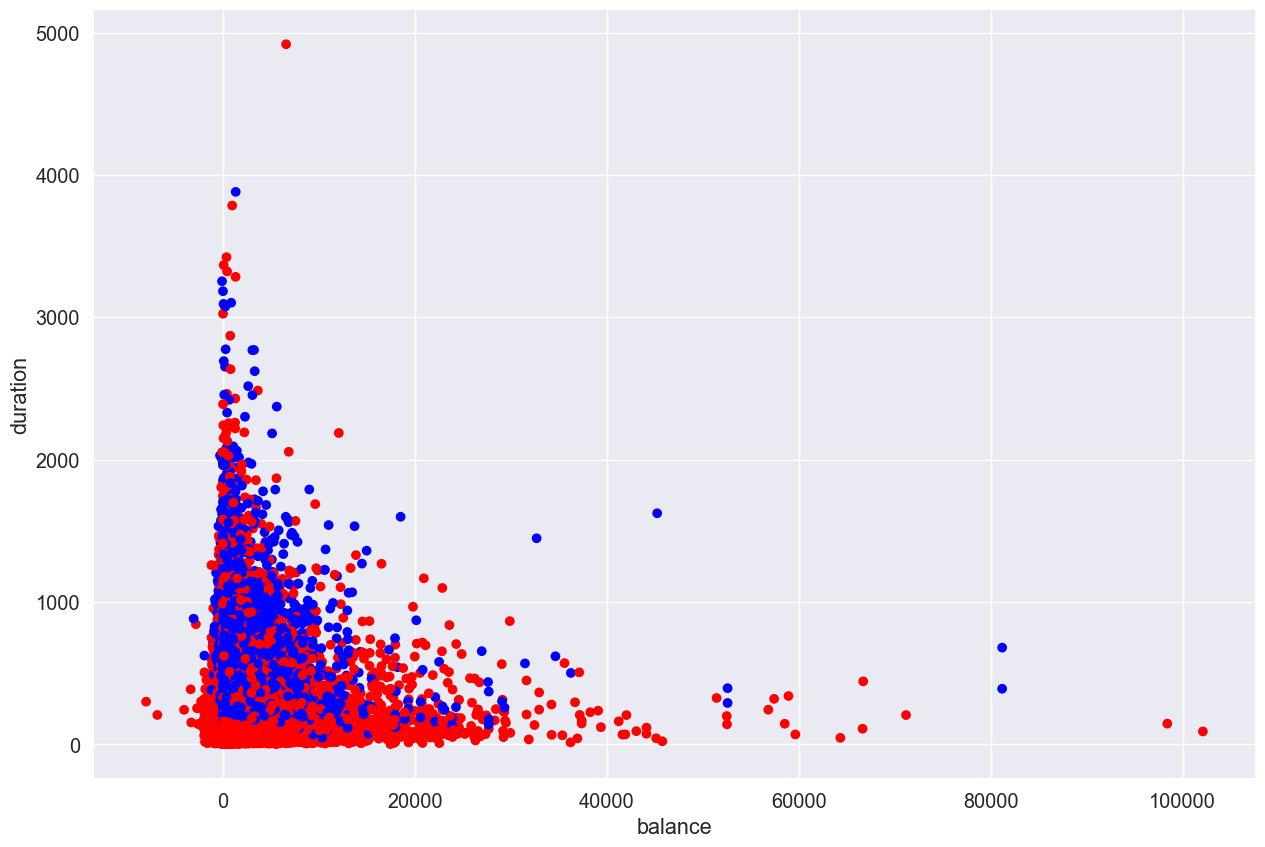

In [30]:
my_columns = ["balance", "duration", "deposit"]
new_df = data_df1[my_columns].dropna()
X_columns = ["balance", "duration"]
X = pd.DataFrame(new_df[X_columns])
y = new_df["deposit"]

colors = ["blue" if deposit == 1 else "red" for deposit in y]
# this means blue for they deposited and red for no deposit
plt.figure(figsize = (15, 10))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors)
plt.xlabel("balance")
plt.ylabel("duration")

plt.show()

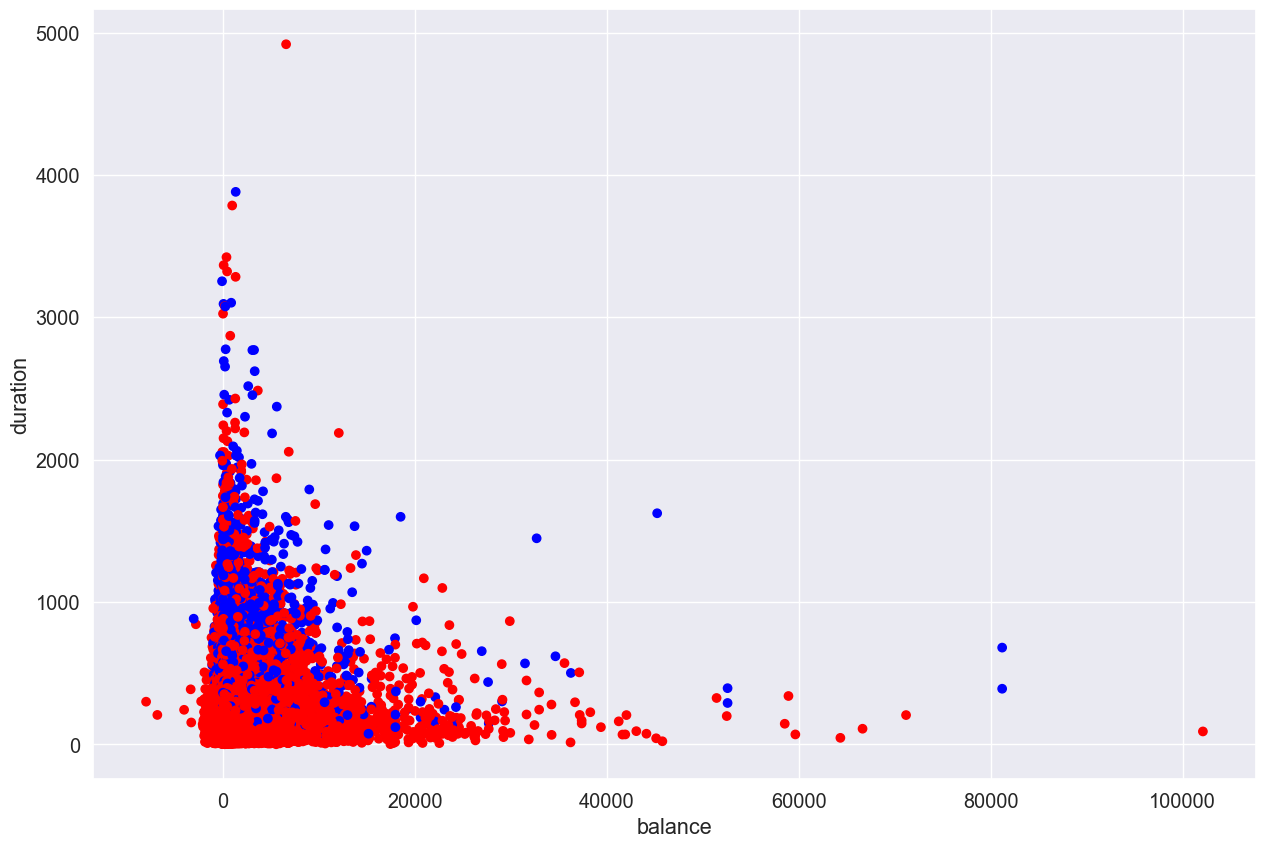

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
c_train = ["blue" if deposit == 1 else "red" for deposit in y_train]
c_test = ["blue" if deposit == 1 else "red" for deposit in y_test]
plt.figure(figsize = (15, 10))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=c_train)
plt.xlabel("balance")
plt.ylabel("duration")
plt.show()

|--- duration <= 510.50
|   |--- duration <= 205.50
|   |   |--- duration <= 130.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  77.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  130.50
|   |   |   |--- balance <= 888.50
|   |   |   |   |--- class: 0
|   |   |   |--- balance >  888.50
|   |   |   |   |--- class: 0
|   |--- duration >  205.50
|   |   |--- balance <= 914.50
|   |   |   |--- duration <= 362.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  362.50
|   |   |   |   |--- class: 0
|   |   |--- balance >  914.50
|   |   |   |--- duration <= 391.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  391.50
|   |   |   |   |--- class: 0
|--- duration >  510.50
|   |--- duration <= 835.50
|   |   |--- duration <= 636.50
|   |   |   |--- balance <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- balance >  0.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  636.50
|   |   |   |--- balance <= 

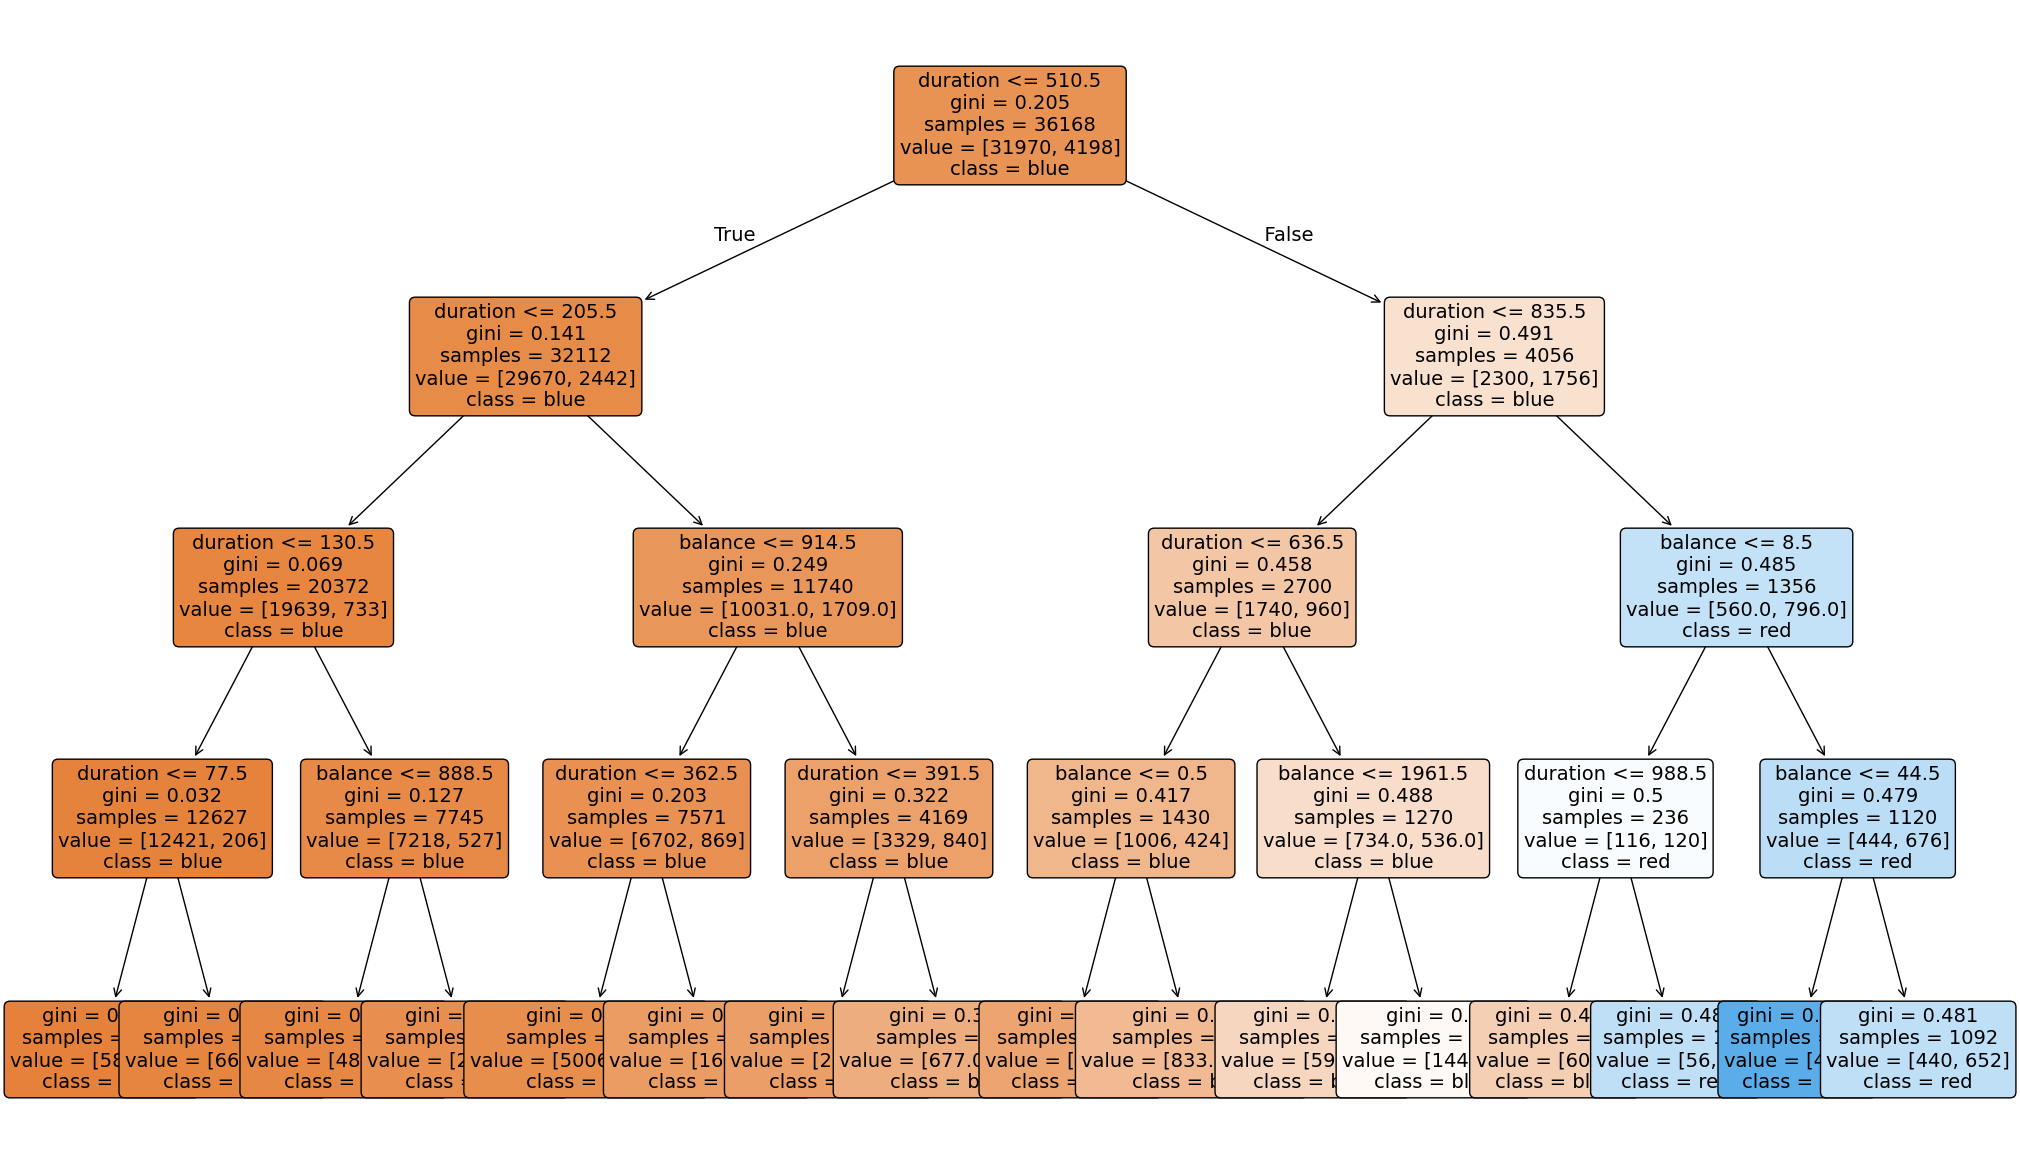

In [8]:
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

tree_rules = export_text(decision_tree, 
                         feature_names= ["balance", "duration"])
print(tree_rules, "\n")

plt.figure(figsize = (25,15))
a = plot_tree(decision_tree,
                         feature_names= ["balance", "duration"],
                         class_names = ["blue", "red"],
                         rounded = True,
                         filled = True,
                         fontsize = 14)
plt.show()

/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


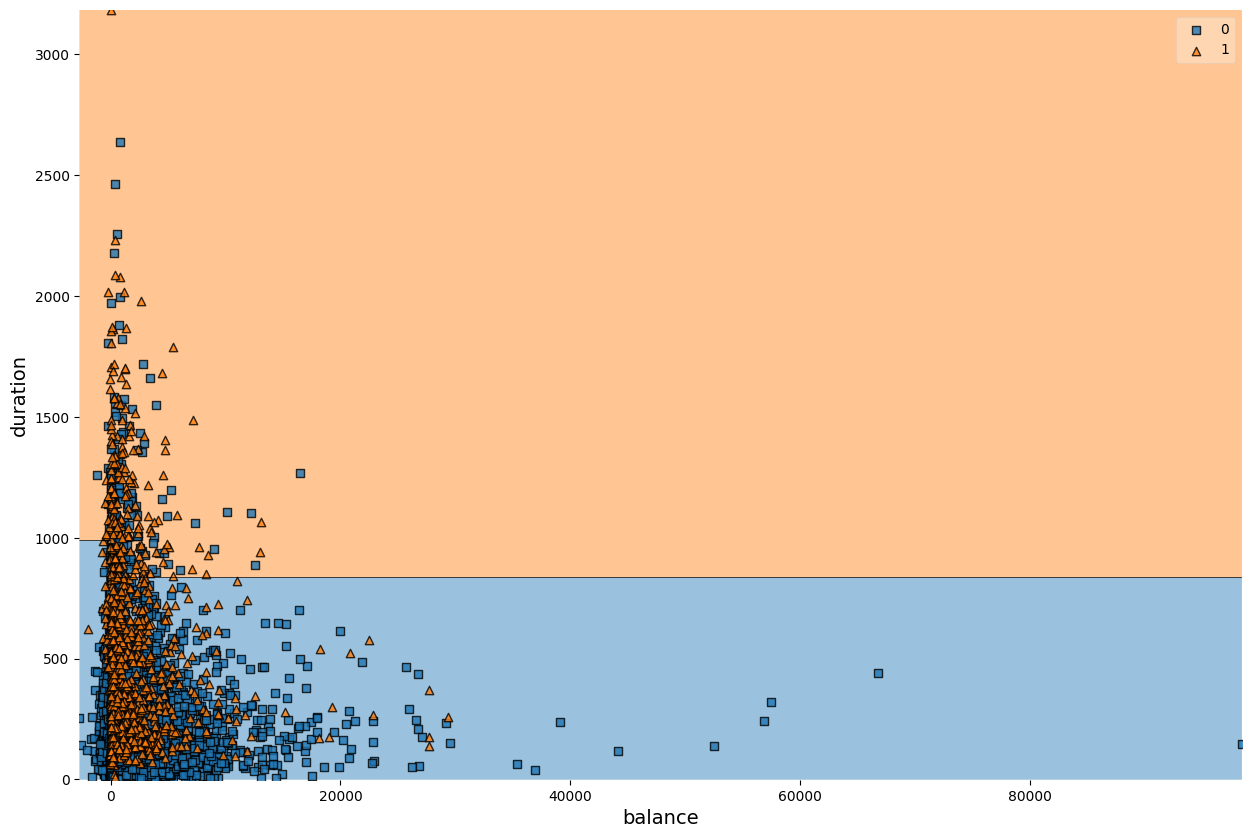

In [9]:
plt.figure(figsize = (15, 10))
plot_decision_regions(X_test.values, y_test.values, clf=decision_tree)
plt.xlabel("balance", fontsize=14)
plt.ylabel("duration", fontsize=14)
plt.show()

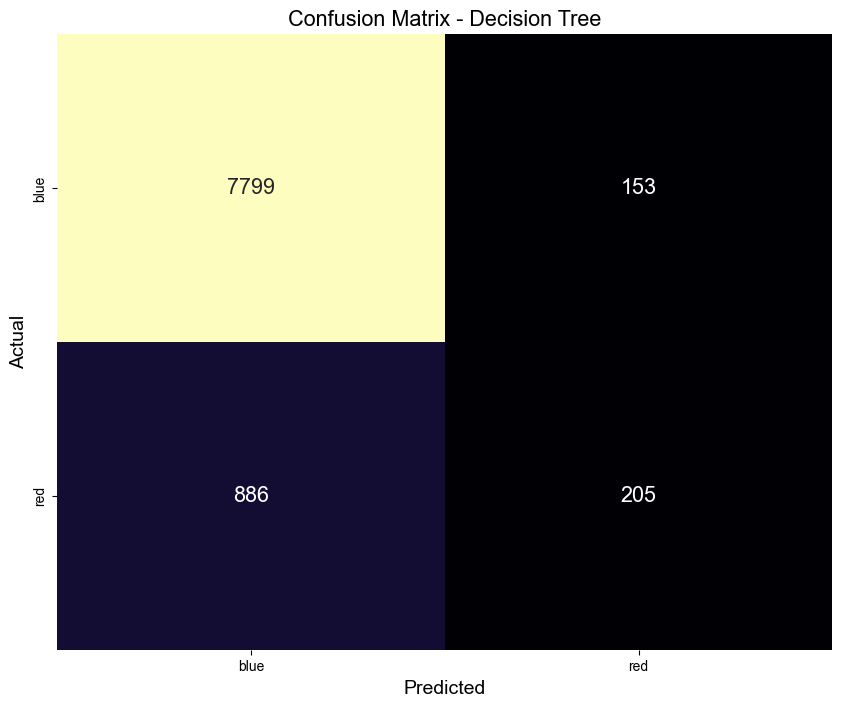

In [10]:
test_pred_decision_tree = decision_tree.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', cmap='magma', cbar = False)
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_xticklabels(["blue", "red"])
ax.set_ylabel("Actual", fontsize=14)
ax.set_yticklabels(["blue", "red"])
plt.show()


In [11]:
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.19      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



Depth = 3

|--- duration <= 510.50
|   |--- duration <= 205.50
|   |   |--- duration <= 130.50
|   |   |   |--- class: 0
|   |   |--- duration >  130.50
|   |   |   |--- class: 0
|   |--- duration >  205.50
|   |   |--- balance <= 914.50
|   |   |   |--- class: 0
|   |   |--- balance >  914.50
|   |   |   |--- class: 0
|--- duration >  510.50
|   |--- duration <= 835.50
|   |   |--- duration <= 636.50
|   |   |   |--- class: 0
|   |   |--- duration >  636.50
|   |   |   |--- class: 0
|   |--- duration >  835.50
|   |   |--- balance <= 8.50
|   |   |   |--- class: 1
|   |   |--- balance >  8.50
|   |   |   |--- class: 1
 



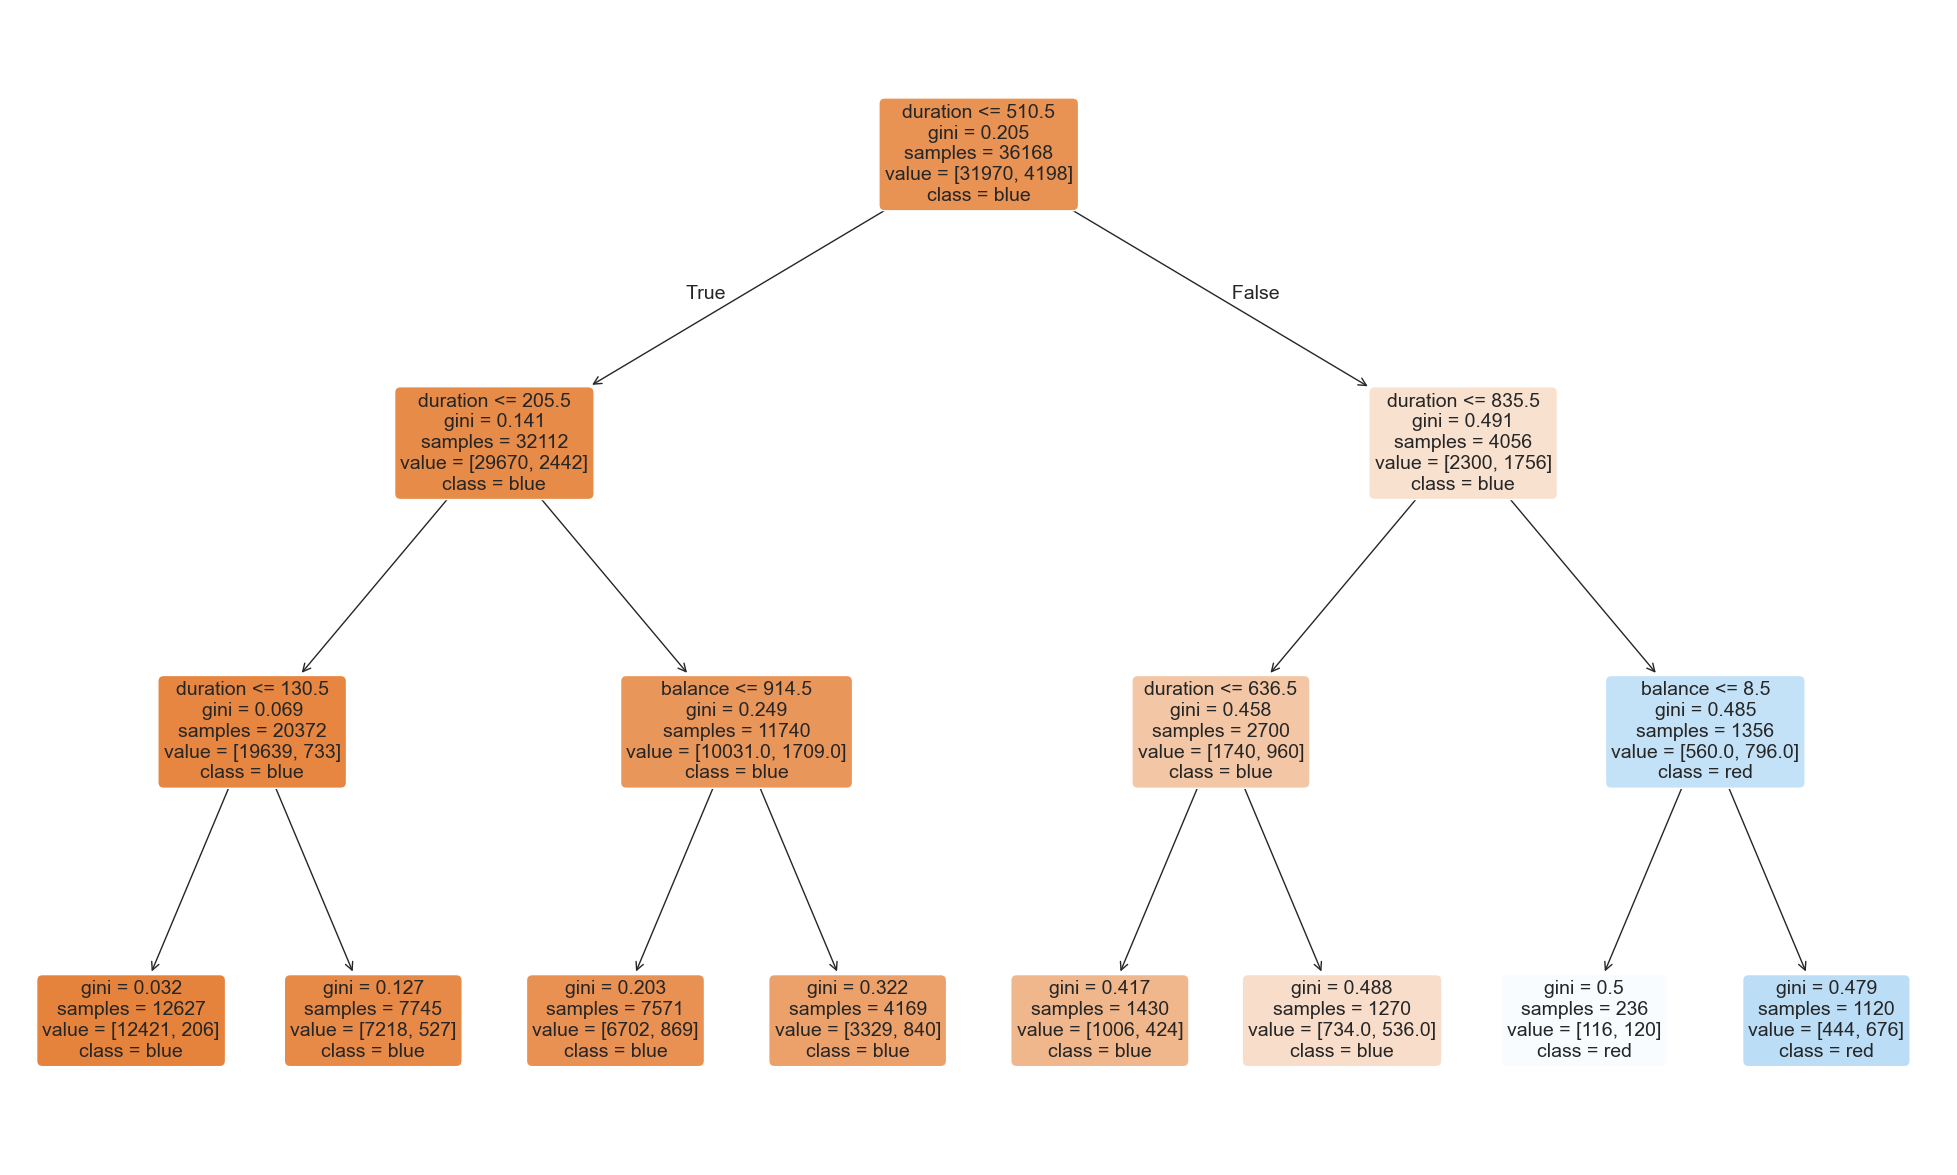

In [12]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

tree_rules = export_text(decision_tree, 
                         feature_names= ["balance", "duration"])
print(tree_rules, "\n")

plt.figure(figsize = (25,15))
a = plot_tree(decision_tree,
                         feature_names= ["balance", "duration"],
                         class_names = ["blue", "red"],
                         rounded = True,
                         filled = True,
                         fontsize = 14)
plt.show()

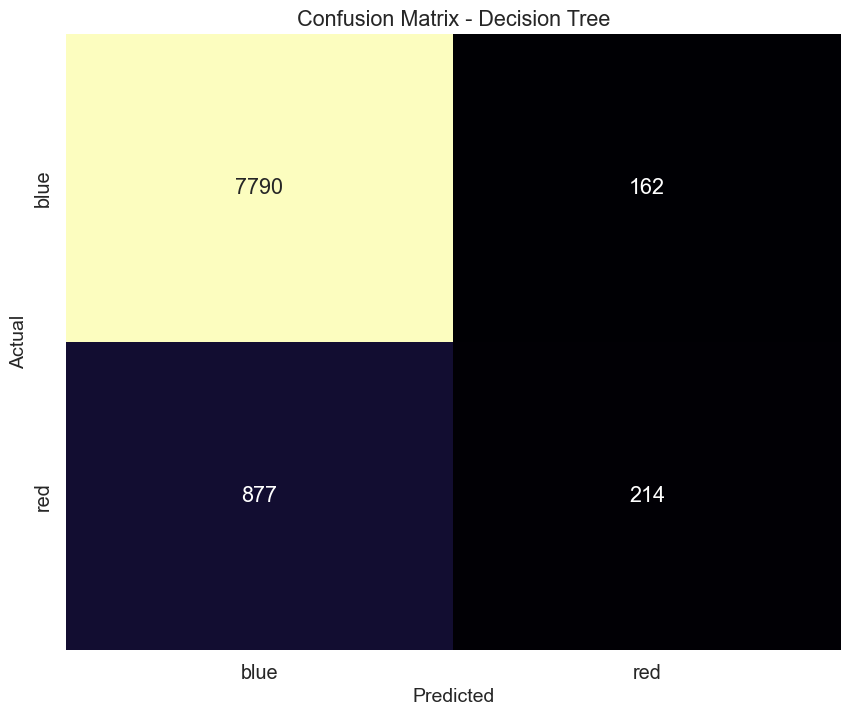

In [13]:
test_pred_decision_tree = decision_tree.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', cmap='magma', cbar = False)
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_xticklabels(["blue", "red"])
ax.set_ylabel("Actual", fontsize=14)
ax.set_yticklabels(["blue", "red"])
plt.show()


In [14]:
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.20      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



Depth = 7

|--- duration <= 510.50
|   |--- duration <= 205.50
|   |   |--- duration <= 130.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- balance <= 9356.00
|   |   |   |   |   |--- duration <= 62.50
|   |   |   |   |   |   |--- duration <= 49.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- duration >  49.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  62.50
|   |   |   |   |   |   |--- duration <= 65.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- duration >  65.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- balance >  9356.00
|   |   |   |   |   |--- balance <= 9467.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- balance >  9467.50
|   |   |   |   |   |   |--- balance <= 10346.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- balance >  10346.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- duration >  77.50
|   |   |   |   

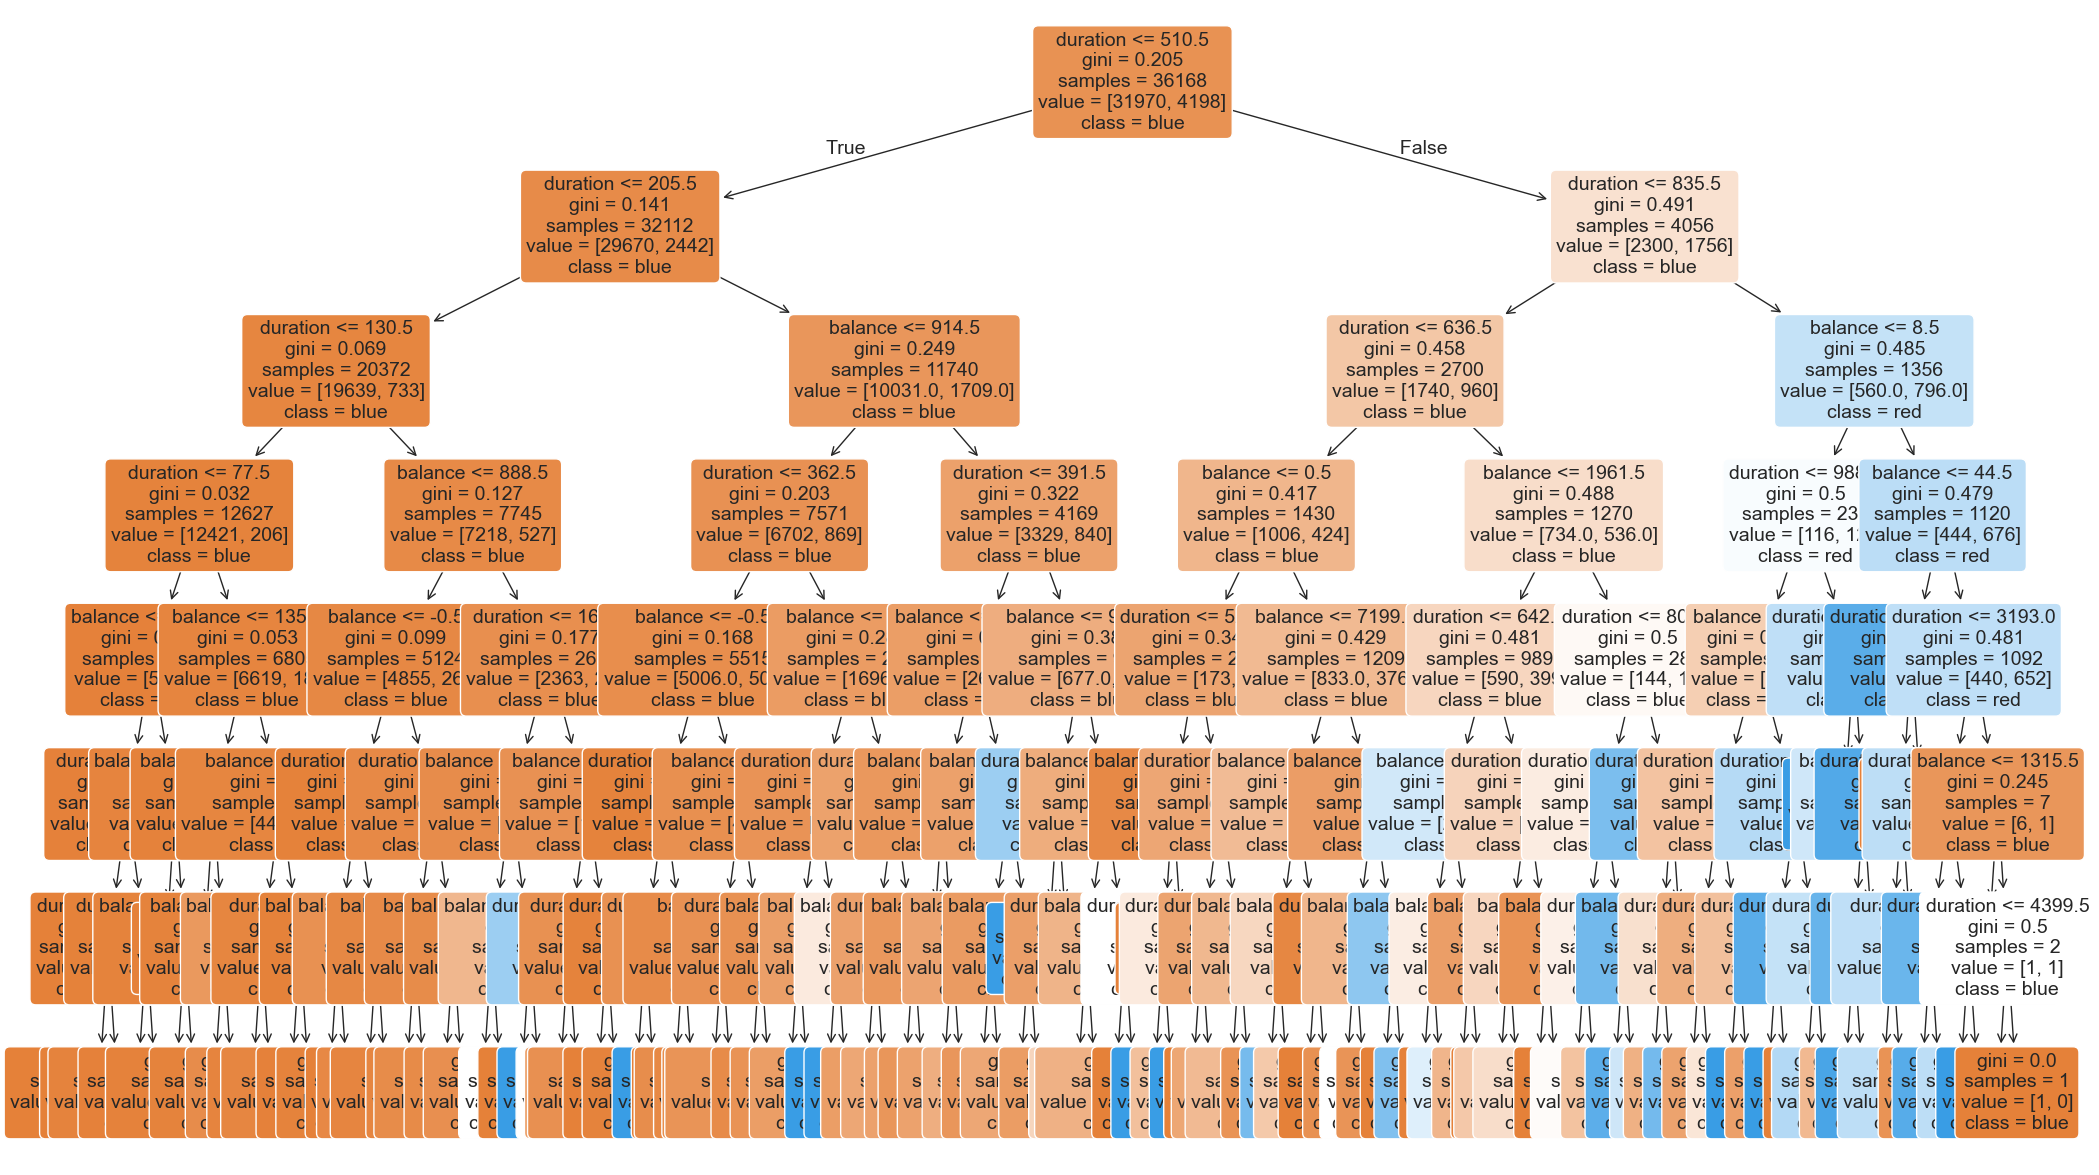

In [15]:
decision_tree = DecisionTreeClassifier(max_depth=7, random_state=42)
decision_tree.fit(X_train, y_train)

tree_rules = export_text(decision_tree, 
                         feature_names= ["balance", "duration"])
print(tree_rules, "\n")

plt.figure(figsize = (25,15))
a = plot_tree(decision_tree,
                         feature_names= ["balance", "duration"],
                         class_names = ["blue", "red"],
                         rounded = True,
                         filled = True,
                         fontsize = 14)

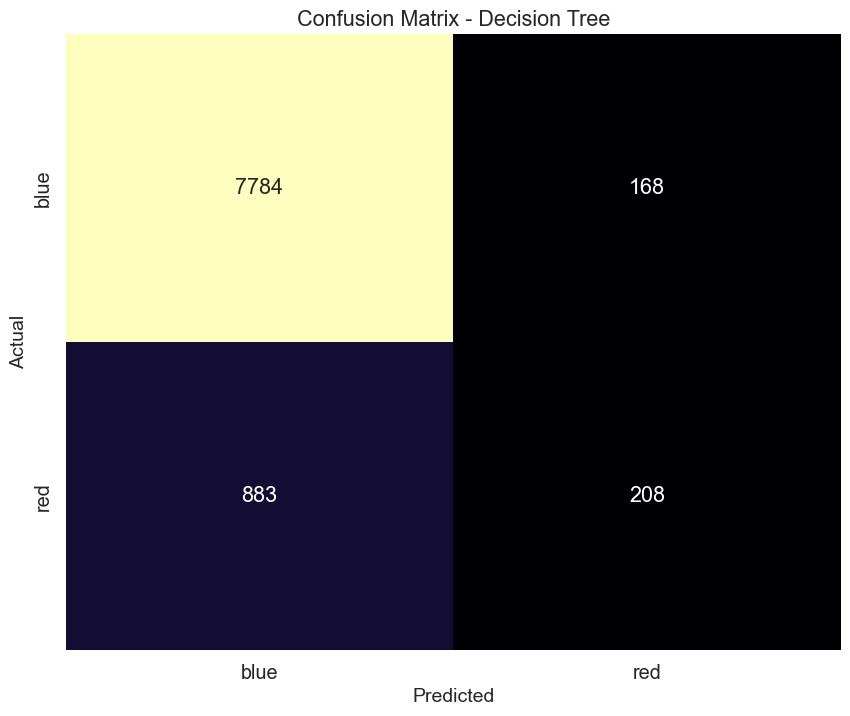

In [16]:
test_pred_decision_tree = decision_tree.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', cmap='magma', cbar = False)
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_xticklabels(["blue", "red"])
ax.set_ylabel("Actual", fontsize=14)
ax.set_yticklabels(["blue", "red"])
plt.show()

In [24]:
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.55      0.19      0.28      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.88      0.86      9043



Not much change in accuracy

Regression Trees

In [33]:
# Prepare features and target for regression
X_reg = data_df1.drop("deposit", axis=1)
y_reg = data_df1["deposit"]

# Convert categorical variables to dummy/indicator variables
X_reg_encoded = pd.get_dummies(X_reg)

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_encoded, y_reg, random_state=12)

In [34]:
# Fit regression tree
reg_tree1 = DecisionTreeRegressor(max_depth=1, random_state=12)
reg_tree1.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_tree1.predict(X_test_reg)
print(f"MSE reg1: {mean_squared_error(y_test_reg, y_pred_reg)} \n")

reg_tree2 = DecisionTreeRegressor(max_depth=20, random_state=12)
reg_tree2.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_tree2.predict(X_test_reg)
print(f"MSE reg2: {mean_squared_error(y_test_reg, y_pred_reg)} \n")

MSE reg1: 0.08890089556306252 

MSE reg2: 0.11113494988303341 



In [35]:
# Fit regression tree
reg_tree1 = DecisionTreeRegressor(max_depth=1)
reg_tree1.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_tree1.predict(X_test_reg)
print(f"MSE reg1: {mean_squared_error(y_test_reg, y_pred_reg)} \n")

reg_tree2 = DecisionTreeRegressor(max_depth=20)
reg_tree2.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_tree2.predict(X_test_reg)
print(f"MSE reg2: {mean_squared_error(y_test_reg, y_pred_reg)} \n")

MSE reg1: 0.08890089556306252 

MSE reg2: 0.10934687785325306 

